In [258]:
import pandas as pd
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [259]:
#this is 1.1 for the memory sample 
memory_df = pd.read_csv("/Users/Joey_Chan/hw1_immunogenetics/memory.csv", sep="\t")
#print(memory_df)
#print(memory_df['v_identity'])
memory_df['sample'] = memory_df['j_call'].map(lambda x: 'memory')
print(memory_df['sample'])

0       memory
1       memory
2       memory
3       memory
4       memory
         ...  
1227    memory
1228    memory
1229    memory
1230    memory
1231    memory
Name: sample, Length: 1232, dtype: object


In [260]:
filtered_memory = memory_df[['v_call', 'j_call', 'cdr3', 'v_identity', 'productive']].copy()
filtered_memory = filtered_memory.dropna()
print(filtered_memory)

                       v_call    j_call  \
0       IGHV1-2*02,IGHV1-2*07  IGHJ4*02   
1    IGHV3-23*01,IGHV3-23D*01  IGHJ1*01   
2                 IGHV4-39*07  IGHJ4*02   
3                  IGHV1-2*04  IGHJ4*02   
4                 IGHV5-51*01  IGHJ4*02   
..                        ...       ...   
995               IGHV3-21*06  IGHJ4*02   
996               IGHV4-59*01  IGHJ4*02   
997              IGHV3-64D*09  IGHJ4*02   
998                IGHV1-2*02  IGHJ6*02   
999  IGHV3-23*01,IGHV3-23D*01  IGHJ6*02   

                                                  cdr3  v_identity productive  
0                 GCGAGAGATCTTGCTAACATAGTGTCTGTTGACTAC      96.284          T  
1              GCGAGTCTTAAATTAGTATGGTTGGGGGAGTTATTAGCC      95.548          T  
2                          GCGAAATATGGCAGTTCGCCCGCGGAC      90.847          T  
3           GCGAGAGGGGGGAGCAGCAACTGGTACGAGGCCTTTGACTTC      90.698          F  
4           GCCATTACGGCTGAGTATAGCAGTGCCTACTTCTTTGACAAG      96.207          T  
.. 

In [261]:
memory_problem1 = pd.DataFrame()
#we are taking our filtered dataframe and now creating another data frame that contains the v gene and j genes used. We are splitting the gene name from the allele name because two different alleles can still mean the same gene
memory_problem1['V gene used'] = filtered_memory['v_call'].map(lambda gene: gene.split('*')[0])
memory_problem1['J gene used'] = filtered_memory['j_call'].map(lambda gene: gene.split('*')[0])
memory_problem1['cdr3_used'] = filtered_memory['cdr3']
memory_problem1['SHM_rate'] = filtered_memory['v_identity'].map(lambda x:(100-x)/100)
memory_problem1['productive'] = filtered_memory['productive']
#create a new collumn that represents value (1 occurance per combo)
#it should be the same length as the v and j gene collums (they are the same length)
memory_problem1['Value'] = np.ones(len(memory_problem1['J gene used']))

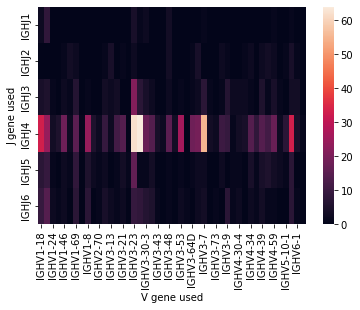

In [262]:
#generating our heatmap

#make our data into table format for heatmap function
memory_heatmap_data = pd.pivot_table(memory_problem1, index = 'J gene used', columns = 'V gene used', values= 'Value', aggfunc= np.sum)
#handling the na values as 0
memory_heatmap_data = memory_heatmap_data.fillna(0)
memory_heatmap = sns.heatmap(memory_heatmap_data)

In [263]:
#this is 1.1 for the naive sample 
naive_df = pd.read_csv("/Users/Joey_Chan/hw1_immunogenetics/naive.csv", sep="\t")
naive_df['sample'] = naive_df['j_call'].map(lambda x: 'naive')
print(naive_df['sample'])

0       naive
1       naive
2       naive
3       naive
4       naive
        ...  
1209    naive
1210    naive
1211    naive
1212    naive
1213    naive
Name: sample, Length: 1214, dtype: object


In [264]:
filtered_naive = naive_df[['v_call', 'j_call', 'cdr3', 'v_identity', 'productive']].copy()
filtered_naive = filtered_naive.dropna()
print(filtered_naive)

                      v_call             j_call  \
0                IGHV3-49*03           IGHJ4*02   
1                IGHV3-33*08           IGHJ6*02   
2                IGHV4-59*01           IGHJ6*02   
3                 IGHV4-4*02           IGHJ2*01   
4                IGHV2-26*01           IGHJ2*01   
..                       ...                ...   
995  IGHV3-66*01,IGHV3-66*04           IGHJ6*02   
996              IGHV4-59*01           IGHJ4*02   
997              IGHV1-58*02  IGHJ4*02,IGHJ5*02   
998              IGHV4-59*01           IGHJ4*02   
999               IGHV1-3*01           IGHJ6*02   

                                                  cdr3  v_identity productive  
0     ACTGGATGGGGCGGGGACGTGGGAGCAACATTTGACTACCTTGATTCC      95.000          T  
1    GCGAGAGATCTACTGCATATGGGAGCTCCACACTACTACTACGGTA...      99.662          T  
2                    GCGAGAGATCGAAGGCACTACGGTATGGACGTC     100.000          T  
3    GCGAGAGAACCTGTTTCCTATAGTGGGAGCCCCGGCTGGTACTTCG...      99.662 

In [265]:
naive_problem1 = pd.DataFrame()
#we are taking our filtered dataframe and now creating another data frame that contains the v gene and j genes used. We are splitting the gene name from the allele name because two different alleles can still mean the same gene
naive_problem1['V gene used'] = filtered_naive['v_call'].map(lambda gene: gene.split('*')[0])
naive_problem1['J gene used'] = filtered_naive['j_call'].map(lambda gene: gene.split('*')[0])
naive_problem1['cdr3_used'] = filtered_naive['cdr3']
naive_problem1['SHM_rate'] = filtered_naive['v_identity'].map(lambda x:(100-x)/100)
naive_problem1['productive'] = filtered_naive['productive']
#create a new collumn that represents value (1 occurance per combo)
#it should be the same length as the v and j gene collums (they are the same length)
naive_problem1['Value'] = np.ones(len(naive_problem1['J gene used']))

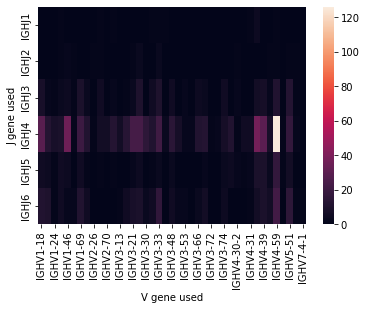

In [266]:
#generating our heatmap

#make our data into table format for heatmap function
naive_heatmap_data = pd.pivot_table(naive_problem1, index = 'J gene used', columns = 'V gene used', values= 'Value', aggfunc= np.sum)
#handling the na values as 0
naive_heatmap_data = naive_heatmap_data.fillna(0)
naive_heatmap = sns.heatmap(naive_heatmap_data)

In [267]:
#this is 1.1 for the plasma sample 
plasma_df = pd.read_csv("/Users/Joey_Chan/hw1_immunogenetics/plasma.csv", sep="\t")
plasma_df['sample'] = plasma_df['j_call'].map(lambda x: 'plasma')
print(plasma_df['sample'])

0       plasma
1       plasma
2       plasma
3       plasma
4       plasma
         ...  
1227    plasma
1228    plasma
1229    plasma
1230    plasma
1231    plasma
Name: sample, Length: 1232, dtype: object


In [268]:
filtered_plasma = plasma_df[['v_call', 'j_call', 'cdr3', 'v_identity', 'productive']].copy()
filtered_plasma = filtered_plasma.dropna()
print(filtered_plasma)

          v_call    j_call                                               cdr3  \
0     IGHV3-7*01  IGHJ5*02  GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...   
1     IGHV3-7*01  IGHJ5*02  GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...   
2    IGHV2-26*01  IGHJ4*02  GCACGGGCCCTTTACTATTGTGGTGGTGACTGCTCGTACAACTTTG...   
3     IGHV3-7*01  IGHJ5*02  GCGAGAAGAGGGAGTTACGGTGACTACGCGGTTCAAATTAACAGCT...   
4    IGHV4-34*01  IGHJ4*02  GCGAGATTCGGGAACATGTCACGATATTTTGACTGCTCATTATAAA...   
..           ...       ...                                                ...   
995   IGHV3-7*01  IGHJ5*02  GCGAGAAGAGGGAGCTACGGTGACTACGCGGTCCATATTAATAGCT...   
996  IGHV3-21*01  IGHJ4*02   GCGAGACCGGGAGCATCGTATAGCAGCAGTTGGTACGACTTTGACTGC   
997   IGHV3-7*01  IGHJ5*02  GCGAGAAGAGGGAGCTATGGTGACTACGCAGTCCAAGTTAACAGCT...   
998  IGHV2-26*01  IGHJ4*02  GCACGTGCTCTTCGGTATTGTGGTGGTGACTGCTCGTACCTGTTTG...   
999   IGHV3-7*01  IGHJ5*02  GCGAGGCGAGCGAGCTACGGTGATTACGCGGTCCAAGTTAACCCCT...   

     v_identity productive 

In [269]:
plasma_problem1 = pd.DataFrame()
#we are taking our filtered dataframe and now creating another data frame that contains the v gene and j genes used. We are splitting the gene name from the allele name because two different alleles can still mean the same gene
plasma_problem1['V gene used'] = filtered_plasma['v_call'].map(lambda gene: gene.split('*')[0])
plasma_problem1['J gene used'] = filtered_plasma['j_call'].map(lambda gene: gene.split('*')[0])
plasma_problem1['cdr3_used'] = filtered_plasma['cdr3']
plasma_problem1['SHM_rate'] = filtered_plasma['v_identity'].map(lambda x:(100-x)/100)
plasma_problem1['productive'] = filtered_plasma['productive']
#create a new collumn that represents value (1 occurance per combo)
#it should be the same length as the v and j gene collums (they are the same length)
plasma_problem1['Value'] = np.ones(len(plasma_problem1['J gene used']))

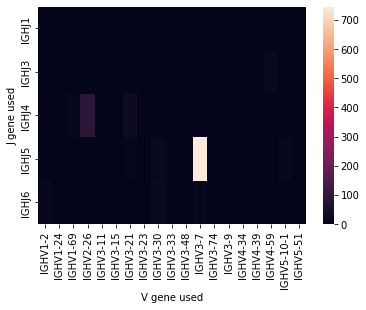

In [270]:
#generating our heatmap

#make our data into table format for heatmap function
plasma_heatmap_data = pd.pivot_table(plasma_problem1, index = 'J gene used', columns = 'V gene used', values= 'Value', aggfunc= np.sum)
#print(plasma_heatmap_data)
#handling the na values as 0
plasma_heatmap_data = plasma_heatmap_data.fillna(0)
plasma_heatmap = sns.heatmap(plasma_heatmap_data)

In [271]:
# problem 1.2 memory
V_genes_used = memory_problem1['V gene used'].value_counts().sort_values(ascending=False)
#print(V_genes_used)

#print("Top Ten V genes used in Memory Cell Dataset: ")

top_ten_V_genes_memory_array = ["IGHV3-23", "IGHV3-30", "IGHV3-7", "IGHV1-2", "IGHV1-18", "IGHV5-51", "IGHV1-69", "IGHV1-8", "IGHV3-30-3", "IGHV3-53"]

for x in top_ten_V_genes_memory_array: 
    print(memory_problem1[memory_problem1['V gene used'] == x])


    V gene used J gene used                                         cdr3_used  \
1      IGHV3-23       IGHJ1           GCGAGTCTTAAATTAGTATGGTTGGGGGAGTTATTAGCC   
18     IGHV3-23       IGHJ5              GCGACCCGCGGTCATAGTATTGGCTGGTTCGCCGAC   
25     IGHV3-23       IGHJ3              GCGAAAACCCCTACTAATTGGGGTGCTTTTGATATC   
34     IGHV3-23       IGHJ4           GCGAAAGGGTGTGGTGGTAGCTGCTACTGGGAAGCCTAC   
62     IGHV3-23       IGHJ3  GCGAAAGATTTGCGCTATTCTCGTGGCTGGGGAGGTGCTTTTGACATC   
..          ...         ...                                               ...   
947    IGHV3-23       IGHJ3  GCGAAAGATGTGCGATATACTACTGGCTGGGGAGGTGCTCTTGACATC   
955    IGHV3-23       IGHJ4                 GCGAAAGGCGCTTGGGTGTATGCTATGAGCTAC   
977    IGHV3-23       IGHJ3           GCGAGAGACCCGGTGGGCGTTGGGCCCGCCTTTGATGTC   
983    IGHV3-23       IGHJ4                       GCGACCCAATTATGGAATACAGAATTC   
999    IGHV3-23       IGHJ6        GCGAAAGGAGTGAGTAGGATTCGCCACTACGGTTTGGACGCC   

     SHM_rate productive  V

In [272]:
SHM_rate_df = memory_problem1[['V gene used', 'SHM_rate']]
SHM_rate_df = SHM_rate_df.loc[SHM_rate_df['V gene used'].isin(["IGHV3-23", "IGHV3-30", "IGHV3-7", "IGHV1-2", "IGHV1-18", "IGHV5-51", "IGHV1-69", "IGHV1-8", "IGHV3-30-3", "IGHV3-53"])]
print(SHM_rate_df)

    V gene used  SHM_rate
0       IGHV1-2   0.03716
1      IGHV3-23   0.04452
3       IGHV1-2   0.09302
4      IGHV5-51   0.03793
6       IGHV3-7   0.00345
..          ...       ...
990     IGHV3-7   0.01375
992     IGHV1-8   0.03378
993    IGHV5-51   0.09247
998     IGHV1-2   0.07432
999    IGHV3-23   0.05763

[568 rows x 2 columns]


<AxesSubplot: xlabel='SHM_rate', ylabel='V gene used'>

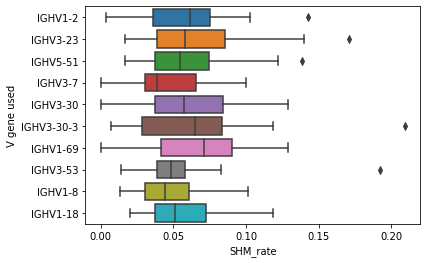

In [273]:
sns.boxplot(data = SHM_rate_df, x = "SHM_rate", y = 'V gene used')

In [274]:
# problem 1.2 naive
V_genes_used = naive_problem1['V gene used'].value_counts().sort_values(ascending=False)
#print(V_genes_used[:10])

print("Top Ten V genes used in Naive Cell Dataset: ")

top_ten_V_genes_naive_array = ["IGHV4-59", "IGHV4-34", "IGHV4-39", "IGHV3-33", "IGHV1-18", "IGHV5-51", "IGHV3-23", "IGHV1-46", "IGHV1-69", "IGHV3-21"]

for x in top_ten_V_genes_naive_array: 
    print(naive_problem1[naive_problem1['V gene used'] == x])

Top Ten V genes used in Naive Cell Dataset: 
    V gene used J gene used                                      cdr3_used  \
2      IGHV4-59       IGHJ6              GCGAGAGATCGAAGGCACTACGGTATGGACGTC   
15     IGHV4-59       IGHJ4  GCGAGAATAGGGGGTGTGTCTTTCGGGGAGCGCCCCATCGACTAC   
19     IGHV4-59       IGHJ3  GCGAGGAGCTATGATAGTAGTGGTTACCTTGATGCTTTTGATATC   
31     IGHV4-59       IGHJ4  GCGAGAATAGGGGGTGTGTCTTTCGGGGAGCGCCCCATCGACTAC   
34     IGHV4-59       IGHJ4  GCGAGAATAGGGGGTGTGTCTTTCGGGGAGCGCCCCATCGACTAC   
..          ...         ...                                            ...   
963    IGHV4-59       IGHJ4  GCGAGAATAGGGGGTGTGTCTTTCGGGGAGCGCCCCATCGACTAC   
973    IGHV4-59       IGHJ4  GCGAGTTTAAGTTGTAGTGGTGGTAGCTGCTACCTATTTGACTAC   
983    IGHV4-59       IGHJ4           GCGGCCTTCCGCCTTATAGCAGCTCGGGGTGCATAC   
996    IGHV4-59       IGHJ4                 GCGAGATTTAGCAGTGGGTCCTTTGACTAC   
998    IGHV4-59       IGHJ4  GCGAGAATAGGGGGTGTGTCTTTCGGGGAGCGCCCCATCGACTAC   

     SHM_rate prod

<AxesSubplot: xlabel='SHM_rate', ylabel='V gene used'>

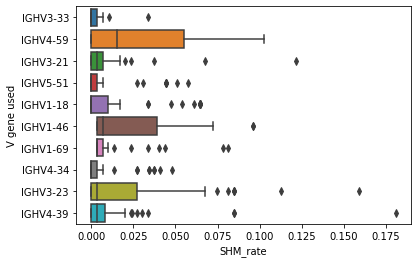

In [275]:
SHM_rate_df = naive_problem1[['V gene used', 'SHM_rate']]
SHM_rate_df = SHM_rate_df.loc[SHM_rate_df['V gene used'].isin(["IGHV4-59", "IGHV4-34", "IGHV4-39", "IGHV3-33", "IGHV1-18", "IGHV5-51", "IGHV3-23", "IGHV1-46", "IGHV1-69", "IGHV3-21"])]
sns.boxplot(data = SHM_rate_df, x = "SHM_rate", y = 'V gene used')

In [276]:
# problem 1.2 plasma
V_genes_used = plasma_problem1['V gene used'].value_counts().sort_values(ascending=False)
print(V_genes_used[:10])

print("Top Ten V genes used in Plasma Cell Dataset: ")

top_ten_V_genes_plasma_array = ["IGHV3-7", "IGHV2-26", "IGHV3-30", "IGHV3-21", "IGHV1-2", "IGHV4-59", "IGHV5-10-1", "IGHV1-69", "IGHV4-39", "IGHV4-34"]
for x in top_ten_V_genes_plasma_array: 
    print(naive_problem1[naive_problem1['V gene used'] == x])

IGHV3-7       760
IGHV2-26       85
IGHV3-30       36
IGHV3-21       31
IGHV1-2        19
IGHV4-59       17
IGHV5-10-1     14
IGHV1-69       11
IGHV4-39        5
IGHV4-34        5
Name: V gene used, dtype: int64
Top Ten V genes used in Plasma Cell Dataset: 
    V gene used J gene used  \
41      IGHV3-7       IGHJ6   
85      IGHV3-7       IGHJ3   
129     IGHV3-7       IGHJ4   
200     IGHV3-7       IGHJ6   
235     IGHV3-7       IGHJ4   
294     IGHV3-7       IGHJ4   
295     IGHV3-7       IGHJ4   
360     IGHV3-7       IGHJ3   
381     IGHV3-7       IGHJ4   
513     IGHV3-7       IGHJ4   
526     IGHV3-7       IGHJ6   
585     IGHV3-7       IGHJ5   
601     IGHV3-7       IGHJ4   
629     IGHV3-7       IGHJ5   
657     IGHV3-7       IGHJ6   
722     IGHV3-7       IGHJ4   
837     IGHV3-7       IGHJ4   
853     IGHV3-7       IGHJ6   
862     IGHV3-7       IGHJ6   
874     IGHV3-7       IGHJ4   
891     IGHV3-7       IGHJ4   
933     IGHV3-7       IGHJ3   
944     IGHV3-7       IGHJ4  

<AxesSubplot: xlabel='SHM_rate', ylabel='V gene used'>

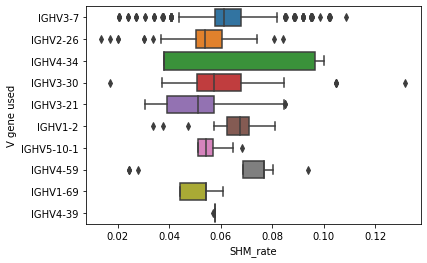

In [277]:
SHM_rate_df = plasma_problem1[['V gene used', 'SHM_rate']]
SHM_rate_df = SHM_rate_df.loc[SHM_rate_df['V gene used'].isin(["IGHV3-7", "IGHV2-26", "IGHV3-30", "IGHV3-21", "IGHV1-2", "IGHV4-59", "IGHV5-10-1", "IGHV1-69", "IGHV4-39", "IGHV4-34"])]
sns.boxplot(data = SHM_rate_df, x = "SHM_rate", y = 'V gene used')

/var/folders/_f/tvw03fpn63n5k242rz18vsvm0000gn/T/ipykernel_7859/3143274942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memory_cdr3_df['cdr3_length'] = memory_cdr3_df['cdr3_used'].map(lambda x:len(x))


<AxesSubplot: xlabel='V gene used', ylabel='cdr3_length'>

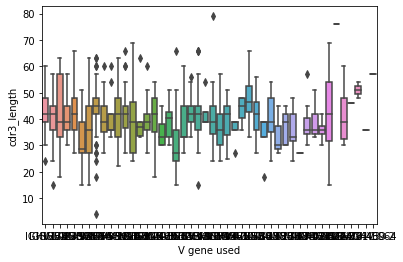

In [278]:
# problem 1.3 memory

memory_cdr3_df = memory_problem1[['V gene used', 'cdr3_used']]
memory_cdr3_df['cdr3_length'] = memory_cdr3_df['cdr3_used'].map(lambda x:len(x))
sns.boxplot(data = memory_cdr3_df, x = "V gene used", y = 'cdr3_length')


/var/folders/_f/tvw03fpn63n5k242rz18vsvm0000gn/T/ipykernel_7859/3489993498.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naive_cdr3_df['cdr3_length'] = naive_cdr3_df['cdr3_used'].map(lambda x:len(x))


<AxesSubplot: xlabel='V gene used', ylabel='cdr3_length'>

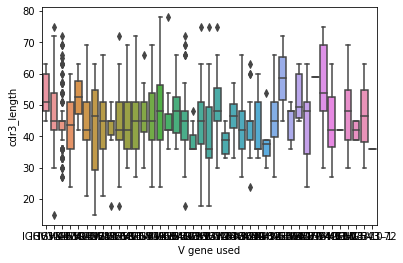

In [279]:
# problem 1.3 naive

naive_cdr3_df = naive_problem1[['V gene used', 'cdr3_used']]
naive_cdr3_df['cdr3_length'] = naive_cdr3_df['cdr3_used'].map(lambda x:len(x))
sns.boxplot(data = naive_cdr3_df, x = "V gene used", y = 'cdr3_length')

/var/folders/_f/tvw03fpn63n5k242rz18vsvm0000gn/T/ipykernel_7859/2794127231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plasma_cdr3_df['cdr3_length'] = plasma_cdr3_df['cdr3_used'].map(lambda x:len(x))


<AxesSubplot: xlabel='V gene used', ylabel='cdr3_length'>

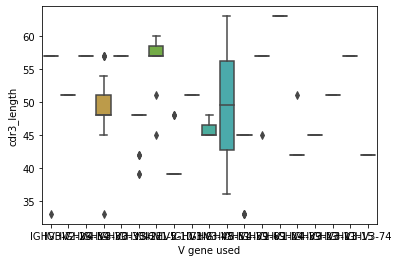

In [280]:
# problem 1.3 plasma

plasma_cdr3_df = plasma_problem1[['V gene used', 'cdr3_used']]
plasma_cdr3_df['cdr3_length'] = plasma_cdr3_df['cdr3_used'].map(lambda x:len(x))
sns.boxplot(data = plasma_cdr3_df, x = "V gene used", y = 'cdr3_length')

In [281]:
#1.4 memory data - make everything into functions 
productive_memory = pd.DataFrame
productive_memory = memory_problem1[['V gene used', 'productive']]
#productive_memory = productive_memory.loc[productive_memory['V gene used'].isin(["IGHV3-23", "IGHV3-30", "IGHV3-7", "IGHV1-2", "IGHV1-18", "IGHV5-51", "IGHV1-69", "IGHV1-8", "IGHV3-30-3", "IGHV3-53"])]
memory_count = productive_memory.productive.value_counts() 
fraction_memory_nonproductive = memory_count[1]/(memory_count[0] + memory_count[1])
print("the fraction of nonproductive sequences in the sample is: " + str(fraction_memory_nonproductive))

the fraction of nonproductive sequences in the sample is: 0.079


In [282]:
#1.4 naive data - make everything into functions 
productive_naive = pd.DataFrame
productive_naive = naive_problem1[['V gene used', 'productive']]
naive_count = productive_naive.productive.value_counts() 
fraction_naive_nonproductive = naive_count[1]/(naive_count[0] + naive_count[1])
print("the fraction of nonproductive sequences in the sample is: " + str(fraction_naive_nonproductive))

the fraction of nonproductive sequences in the sample is: 0.031


In [283]:
#1.4 plasma data - make everything into functions 
productive_plasma = pd.DataFrame
productive_plasma = plasma_problem1[['V gene used', 'productive']]
plasma_count = productive_plasma.productive.value_counts() 
fraction_plasma_nonproductive = plasma_count[1]/(plasma_count[0] + plasma_count[1])
print("the fraction of nonproductive sequences in the sample is: " + str(fraction_plasma_nonproductive))

the fraction of nonproductive sequences in the sample is: 0.032


In [284]:
#part 2.1
data_list = [memory_df, naive_df, plasma_df]
all_three_df = pd.concat(data_list, ignore_index=True)
all_three_df = all_three_df.dropna()
print(all_three_df['sample'])

0       memory
1       memory
2       memory
3       memory
4       memory
         ...  
3441    plasma
3442    plasma
3443    plasma
3444    plasma
3445    plasma
Name: sample, Length: 2661, dtype: object


In [285]:
part_2_df = pd.DataFrame()
#we are taking our filtered dataframe and now creating another data frame that contains the v gene and j genes used. We are splitting the gene name from the allele name because two different alleles can still mean the same gene
part_2_df['V gene used'] = all_three_df['v_call'].map(lambda gene: gene.split('*')[0])
part_2_df['J gene used'] = all_three_df['j_call'].map(lambda gene: gene.split('*')[0])
part_2_df['cdr3_used'] = all_three_df['cdr3']
part_2_df['SHM_rate'] = all_three_df['v_identity'].map(lambda x:(100-x)/100)
part_2_df['productive'] = all_three_df['productive']
#create a new collumn that represents value (1 occurance per combo)
#it should be the same length as the v and j gene collums (they are the same length)
part_2_df['Value'] = np.ones(len(part_2_df['J gene used']))
part_2_df['sample'] = all_three_df['sample']
print(part_2_df)

     V gene used J gene used  \
0        IGHV1-2       IGHJ4   
1       IGHV3-23       IGHJ1   
2       IGHV4-39       IGHJ4   
3        IGHV1-2       IGHJ4   
4       IGHV5-51       IGHJ4   
...          ...         ...   
3441     IGHV3-7       IGHJ5   
3442    IGHV3-21       IGHJ4   
3443     IGHV3-7       IGHJ5   
3444    IGHV2-26       IGHJ4   
3445     IGHV3-7       IGHJ5   

                                              cdr3_used  SHM_rate productive  \
0                  GCGAGAGATCTTGCTAACATAGTGTCTGTTGACTAC   0.03716          T   
1               GCGAGTCTTAAATTAGTATGGTTGGGGGAGTTATTAGCC   0.04452          T   
2                           GCGAAATATGGCAGTTCGCCCGCGGAC   0.09153          T   
3            GCGAGAGGGGGGAGCAGCAACTGGTACGAGGCCTTTGACTTC   0.09302          F   
4            GCCATTACGGCTGAGTATAGCAGTGCCTACTTCTTTGACAAG   0.03793          T   
...                                                 ...       ...        ...   
3441  GCGAGAAGAGGGAGCTACGGTGACTACGCGGTCCATATTAATAGCT...

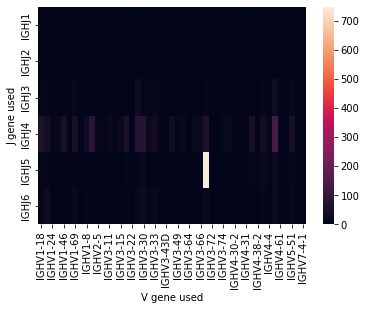

In [286]:
#generating our heatmap

#make our data into table format for heatmap function
all3_heatmap_data = pd.pivot_table(part_2_df, index = 'J gene used', columns = 'V gene used', values= 'Value', aggfunc= np.sum)
#handling the na values as 0
all3_heatmap_data = all3_heatmap_data.fillna(0)
all3_heatmap = sns.heatmap(all3_heatmap_data)

#white block represents the highest 

<AxesSubplot: xlabel='V gene used', ylabel='J gene used'>

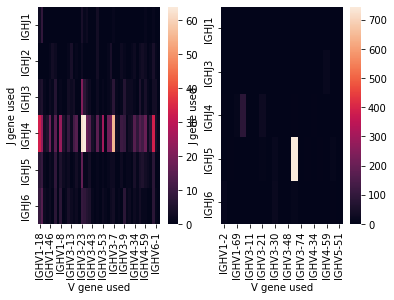

In [287]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.heatmap(memory_heatmap_data, ax = ax1)
sns.heatmap(plasma_heatmap_data, ax = ax2)

# On the left, the memory sample has significant diversity with VJ combinations; there is a lot of purple and red, which indicates a low numeber of sequences used that specific VJ combination. In other words, there is a lot of diversity. 
# On the right, the plasma sample lacks diversity; there is an extremely large amount of usage of a specific VJ combination (white block). 

/var/folders/_f/tvw03fpn63n5k242rz18vsvm0000gn/T/ipykernel_7859/184958598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cdr3_df['cdr3_length'] = all_cdr3_df['cdr3_used'].map(lambda x:len(x))


<AxesSubplot: xlabel='cdr3_length', ylabel='sample'>

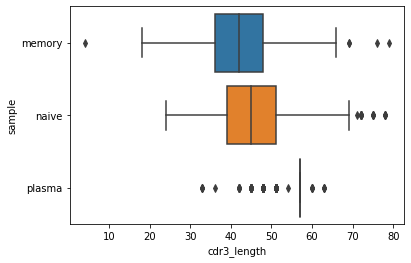

In [288]:
# problem 2.2 

all_cdr3_df = part_2_df[['sample', 'cdr3_used']]
all_cdr3_df['cdr3_length'] = all_cdr3_df['cdr3_used'].map(lambda x:len(x))
#cdr3_df = cdr3_df.loc[cdr3_df['V gene used'].isin(["IGHV3-23", "IGHV3-30", "IGHV3-7", "IGHV1-2", "IGHV1-18", "IGHV5-51", "IGHV1-69", "IGHV1-8", "IGHV3-30-3", "IGHV3-53"])]
sns.boxplot(data = all_cdr3_df, x = "cdr3_length", y = 'sample')

# plasma cells encounter the most amount of antigen, so they undergo rapid mutation, so their CDR3 lengths differ greatly. CDR3 regions are also highly mutable because they represent antigen binding site. 

<AxesSubplot: xlabel='SHM_rate', ylabel='sample'>

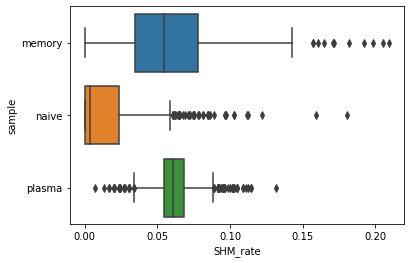

In [289]:
# problem 2.3 
all3_SHM_df = part_2_df[['sample', 'SHM_rate']]
sns.boxplot(data = all3_SHM_df, x = "SHM_rate", y = 'sample')
# plasma cells are most mutable because they encounter the most antigen, and naive cells are least mutable because they have not encountered any antigen yet, because they have only recently left the bone marrow. 

In [290]:
# problem 2.4
memory_array_df = pd.DataFrame(top_ten_V_genes_memory_array)
naive_array_df = pd.DataFrame(top_ten_V_genes_naive_array)
plasma_array_df = pd.DataFrame(top_ten_V_genes_plasma_array)
data = [memory_array_df, naive_array_df, plasma_array_df]
top_ten_all_three_df = pd.concat(data, ignore_index=True)
top_ten_counts_all_three = top_ten_all_three_df.value_counts(ascending=False)
print("There is only one gene in common across all three samples: IGHV1-69")


There is only one gene in common across all three samples: IGHV1-69


<AxesSubplot: xlabel='SHM_rate', ylabel='sample'>

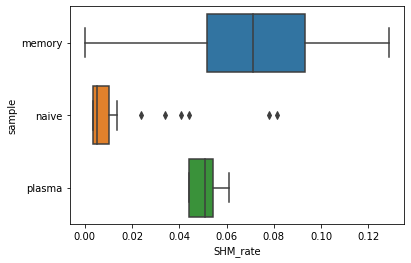

In [291]:
SHM_rate_IGHV1_69_df = part_2_df[['V gene used', 'SHM_rate', 'sample']]
SHM_rate_IGHV1_69_df = SHM_rate_IGHV1_69_df.loc[SHM_rate_IGHV1_69_df['V gene used'] == 'IGHV1-69']
sns.boxplot(data = SHM_rate_IGHV1_69_df, x = "SHM_rate", y = 'sample')
# IGHV1-69 is most mutable in the memory sample, while it is least mutable in the naive dataset 

In [300]:
# problem 2.5 
print("Productiveness Data")
print()
print("memory productiveness : " + str(1-fraction_memory_nonproductive))
print("naive productiveness : " + str(1-fraction_naive_nonproductive))
print("plasma productiveness : " + str(1-fraction_plasma_nonproductive))
print()
print("All samples have a productiveness rate of above ninety percent with the naive and plasma samples being nearly identical; however, the memory sample has about 4% less productiveness compared to the other samples.")

Productiveness Data

memory productiveness : 0.921
naive productiveness : 0.969
plasma productiveness : 0.968

All samples have a productiveness rate of above ninety percent with the naive and plasma samples being nearly identical; however, the memory sample has about 4% less productiveness compared to the other samples.
